# Bank Marketing - Data Analysis and Machine Learning Project

Variable descriptions (from the ```bank-additional-names.txt``` file in this repo):

#### Bank client data:

- **age**: Age of the client.
- **job**: Type of job that the client works in.
- **marital**: Marital status (divorced, married, single, unknown). _Note:_ "divorced" means divorced or widowed.
- **education**: The educational level of the client.
- **default**: Whether the client has credit in default (no, yes, unknown).
- **housing**: Whether the client has housing loan (no, yes, unknown).
- **loan**: Whether the client has personal loan (no, yes, unknown).

#### Data from the last contact of the current campaign:

- **contact**: Contact communication type (cellular, telephone).
- **month**: Last month of the year that the client has been contacted.
- **duration**: Last contact duration, in seconds.

#### Comparison between this marketing campaign and past marketing campaigns:

- **campaign**: number of contacts performed during this campaign and for this client (includes last contact).
- **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted).
- **previous**: Number of contacts performed before this campaign and for this client.
- **poutcome**: outcome of the previous marketing campaign (failure, non-existent, success).

#### Social and economic context:

This is the additional data that is added after the dataset has been publicized in the UCI Machine Learning Repository (hence the difference between the ```bank``` folder and ```bank_additional``` folder in this repo).

- **emp.var.rate**: Employment variation rate - quarterly indicator.
- **cons.price.idx**: Consumer price index - monthly indicator.
- **cons.conf.idx**: Consumer confidence index - monthly indicator.
- **euribor3m**: Euribor 3 month rate - daily indicator.
- **nr.employed**: number of employees - quarterly indicator.

_Notes:_ Euribor (Euro Interbank Offered Rate) is the interest rate that banks in the European Union borrow funds from each other. There are 5 different types of Euribor rates corresponding to 5 different maturity timeframes: 1 week, 1 month, 3 months, 6 months, and 12 months.

#### Output variable (desired target):

- **y**: Whether the client has subscribed a term deposit (yes/no).

_Notes from the data curator:_ The **duration** attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### I. Import the libraries and the dataset, performing some initial checks of the data

In [173]:
# Import the necessary data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [174]:
# Import the dataset
bank_marketing = pd.read_csv('data/bank-additional/bank-additional-full.csv', delimiter = ';')
bank_marketing.head(10)
# Can also import the dataset using an existing Python library associated with UCI Machine Learning Repository
# https://github.com/uci-ml-repo/ucimlrepo

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [175]:
# Number of rows and columns
bank_marketing.shape

(41188, 21)

In [176]:
# Get an overview of numerical columns
bank_marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [177]:
# Check for data types
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [178]:
# Check for null values
bank_marketing.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The dataset does not have any null values, but according to the variable descriptions, there are some missing values in some categorical columns marked with ```unknown```. In addition, for the ```pdays``` column (number of days after the client was contacted from a previous campaign), the value ```999``` can be treated as missing because it denotes that the client had not been contacted before.

In [179]:
# Check for unique values
bank_marketing.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [180]:
# Check for duplicated rows (except for the first occurence)
print(f'Number of duplicated rows in the dataset: {bank_marketing.duplicated().sum()}')
print(f'The index of duplicated rows: {bank_marketing.duplicated()[bank_marketing.duplicated() == True].index.tolist()}')
# bank_marketing.duplicated()[bank_marketing.duplicated() == True]: only extracts the duplicated rows (except for the first occurence)

Number of duplicated rows in the dataset: 12
The index of duplicated rows: [1266, 12261, 14234, 16956, 18465, 20216, 20534, 25217, 28477, 32516, 36951, 38281]


In [181]:
# Get the index of duplicated rows (including the first instance):
bank_marketing[bank_marketing.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Because the personally identifiable information such as name, contact point (phone number or email/ social media account), or any generic client ID is suppressed, we did not know exactly if there happens to be more than one client having the same background and living in the same socio-economic indicators. Therefore, we cannot readily drop all duplicates without necessary background information.

However, from my own judgment, when the duplicated columns are located next to their first instances, this might mean an error on the bank's part to process the same person twice in a row. Therefore, I have decided to drop duplicated records that are located next to their first instance. For example, I will drop row ```1266``` because it is located close to a previous instance, row ```1265```.

In [182]:
bank_marketing.drop(bank_marketing.index[[1266, 12261, 18465, 20534, 28477, 36951]], inplace = True)
# Check the shape of the DataFrame after dropping close duplicates
bank_marketing.shape

(41182, 21)

### II. Exploratory data analysis

#### 1. What is the distribution of each numerical column?

Text(0.5, 0.98, 'Distribution of each numerical column in the Bank Marketing dataset (histograms)')

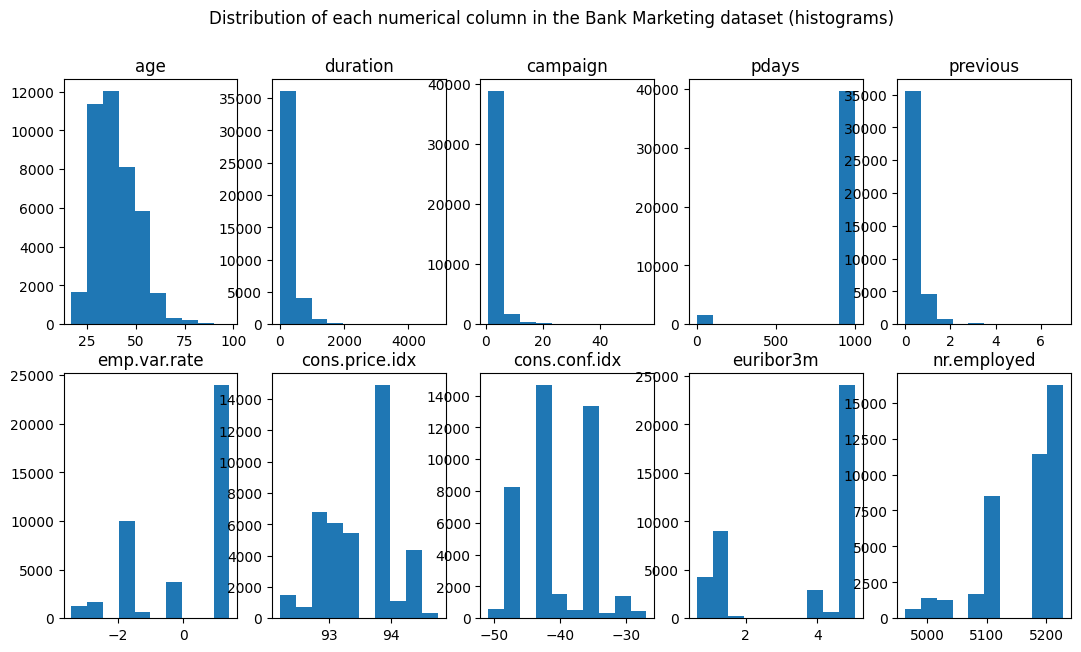

In [183]:
numerical_col_list = bank_marketing.describe().columns.tolist() # keep a list of numerical columns
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (13, 7))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_col_list:
    ax[counter // 5][counter % 5].hist(bank_marketing[var])
    ax[counter // 5][counter % 5].set_title(var)
    counter += 1

fig.suptitle('Distribution of each numerical column in the Bank Marketing dataset (histograms)')

Text(0.5, 0.98, 'Distribution of each numerical column in the Bank Marketing dataset (box plots)')

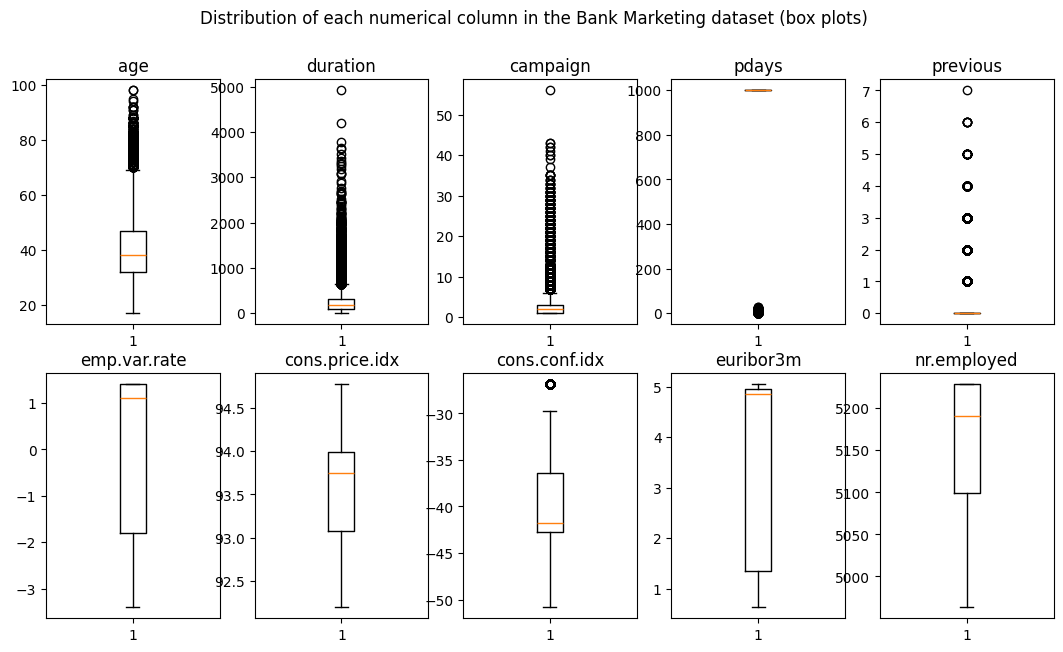

In [184]:
# Look more closely at the distribution metrics
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (13, 7))

counter = 0
for var in numerical_col_list:
    ax[counter // 5][counter % 5].boxplot(bank_marketing[var])
    ax[counter // 5][counter % 5].set_title(var)
    counter += 1

fig.suptitle('Distribution of each numerical column in the Bank Marketing dataset (box plots)')

#### Some insights from numerical columns:

- The numerical columns span very different ranges and have very different distributions, depending on the typical characteristics of the data, so feature scaling like standardization (when the model requires) is very essential for many models to run efficiently.
- ```duration```, ```campaign```, ```pdays```, ```previous``` are some of the most highly skewed variables, suggesting that there are a large number of outliers if the data is untreated. However, apart from the ```pdays``` column, in which ```999``` is a 'missing value', I do not think that the outliers are unjustified, so I decided not to drop them when processing my model.
- It seems that there was not much variance in all the socio-economic indicators listed in the dataset (the second row in the graphs), compared to the other numerical variables. However, because I have yet to obtain the necessary knowledge of macroeconomics, I could not explain very clearly whether the economy is good or bad.

Another important observation is that the presence of the "missing value" ```999``` in the ```pdays``` column, denoting that the client has not been contacted in a previous campaign, has heavily skewed the data. The median is very close to 1000, and there are many outliers under 100, suggesting that the vast majority of clients have not been contacted in the previous campaign.

I decided to visualize the ```pdays``` again, this time distinguishing between the ```999``` values and other smaller values which suggest the client has been contacted before.

Text(0.5, 0.98, 'Days after the client has been contacted in a previous campaign')

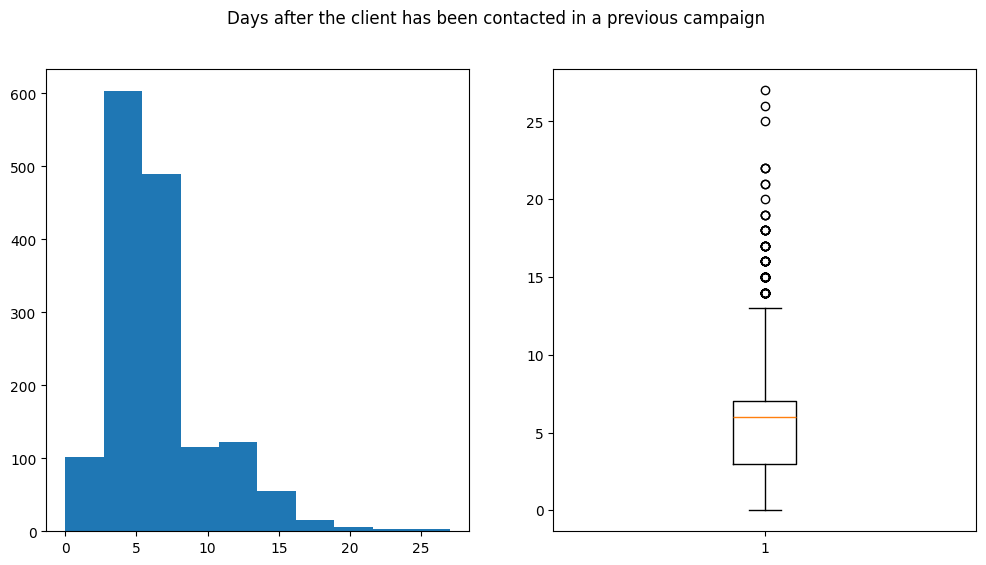

In [185]:
# Distribution of "pdays" without the missing values
pday_dropped = bank_marketing[bank_marketing['pdays'] != 999]
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
ax[0].hist(pday_dropped['pdays'])
ax[1].boxplot(pday_dropped['pdays'])
fig.suptitle('Days after the client has been contacted in a previous campaign')

In [186]:
# Distribution of missing vs. non-missing values
# Add a column to check whether "pdays" value is valid
pday_missing = bank_marketing.copy()
pday_missing['pday_missing'] = np.where(pday_missing['pdays'] == 999, 'missing', 'non-missing')
pday_missing[['pdays', 'pday_missing']].tail(10)

,pdays,pday_missing
41178,6,non-missing
41179,999,missing
41180,999,missing
41181,999,missing
41182,9,non-missing
41183,999,missing
41184,999,missing
41185,999,missing
41186,999,missing
41187,999,missing


<BarContainer object of 2 artists>

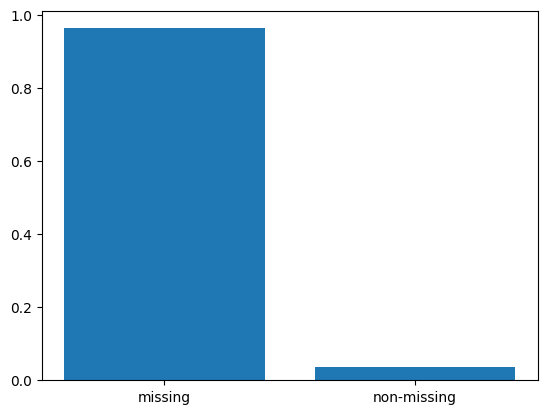

In [187]:
# Visualize the proportion of missing and non-missing values
fig, ax = plt.subplots()
ax.bar(pday_missing['pday_missing'].value_counts().index, pday_missing['pday_missing'].value_counts().values / pday_missing.shape[0])

In [188]:
bank_marketing[bank_marketing['pdays'] == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25497,31,unemployed,single,professional.course,no,yes,no,cellular,nov,wed,...,1,0,1,success,-0.1,93.200,-42.0,4.120,5195.8,no
25996,35,management,married,university.degree,no,yes,yes,telephone,nov,wed,...,3,0,2,success,-0.1,93.200,-42.0,4.120,5195.8,no
30238,51,technician,married,professional.course,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30314,36,admin.,married,university.degree,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30417,30,admin.,single,university.degree,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30688,35,blue-collar,married,basic.6y,unknown,yes,no,cellular,may,tue,...,1,0,1,success,-1.8,92.893,-46.2,1.344,5099.1,no
40360,48,admin.,married,university.degree,no,yes,yes,cellular,aug,wed,...,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40364,27,student,single,university.degree,no,yes,no,cellular,aug,wed,...,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40365,28,student,single,basic.9y,no,yes,no,cellular,aug,wed,...,1,0,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40376,27,student,single,university.degree,no,yes,no,telephone,aug,wed,...,1,0,5,success,-1.7,94.027,-38.3,0.900,4991.6,no


When I visualized the number of 'missing values' (```999```) in the ```pdays``` variable, there is a strong class imbalance because the proportion of clients who have been contacted from a previous campaign was very small in the dataset (less than 10%). Perhaps this was because the current campaign listed in this dataset was more focused on attracting new customers rather than retaining the current customers.

#### 2. How are numerical columns correlated?

Text(0.5, 1.0, 'Correlation between numerical variables of the Bank Marketing dataset')

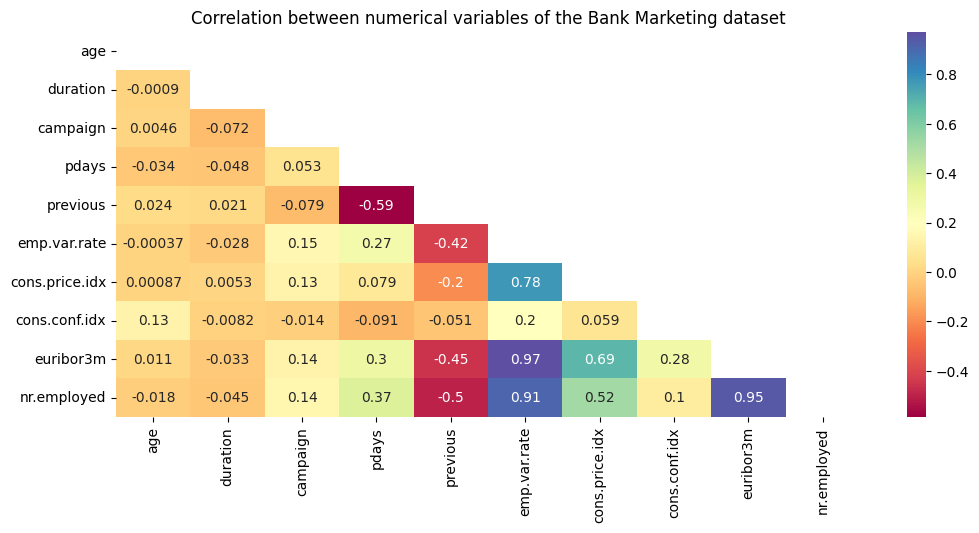

In [189]:
# Check the correlation between selected numerical columns
bank_marketing_corr = bank_marketing[numerical_col_list].corr()
plt.figure(figsize = (12, 5))
sns.heatmap(data = bank_marketing_corr, mask = np.triu(bank_marketing_corr), cmap = 'Spectral', annot = True)
# Used np.triu to show only the lower triangle of the correlation graph
plt.title('Correlation between numerical variables of the Bank Marketing dataset')

Most of the numerical columns in the Bank Marketing dataset correlates weakly with each other (some pairs having r < 0.01), which helps reduce my preprocessing effort before implementing any machine learning model. It is important to avoid multicollinearity, when two or more feature variables are strongly linearly correlated, because with multicollinearity, it is much more difficult to attribute which factor(s) have the most impact on the target variable.

There are still some strongly correlated pairs of variable (r > 0.9), including ```(euribor3m, nr.employed)```, ```(nr.employed, emp.var.rate)```, and ```(euribor3m, emp.var.rate)```.

#### 3. What are the categories of each categorical column, and how are they distributed?

Text(0.5, 0.95, 'Distribution of each category in categorical columns of the Bank Marketing dataset (raw numbers)')

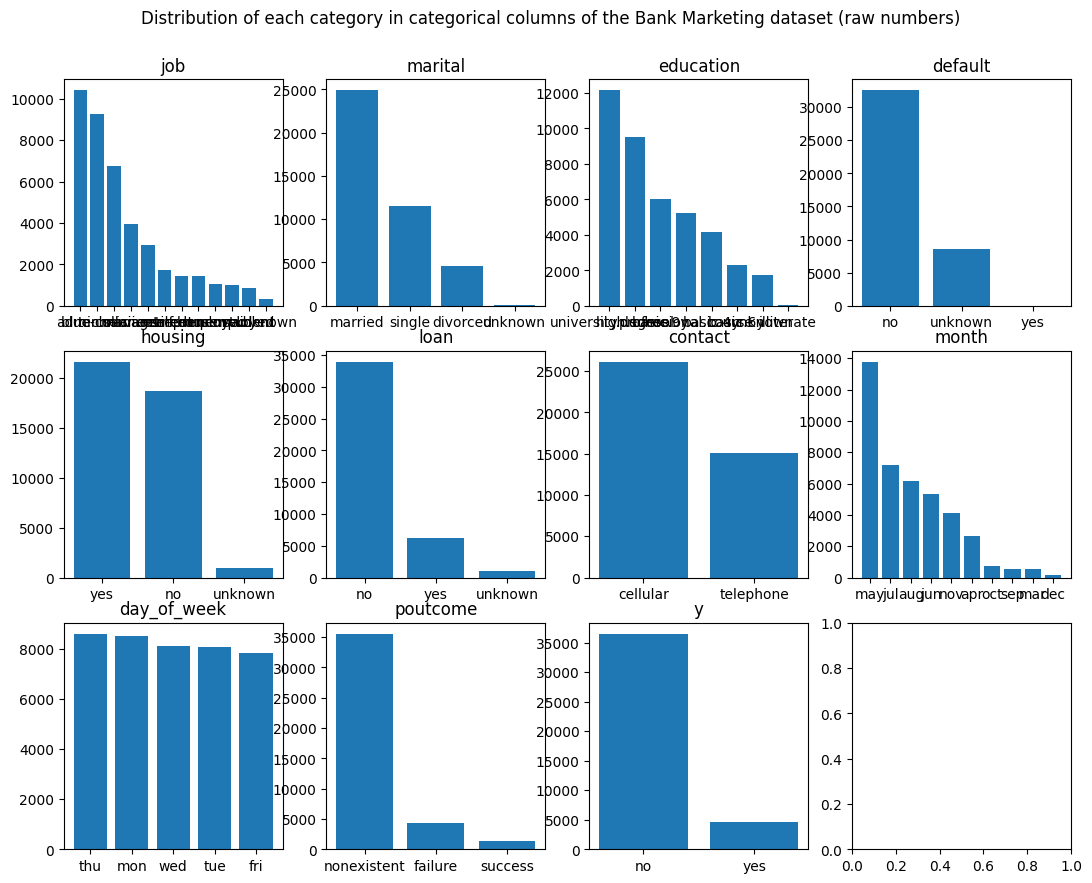

In [190]:
# Drop the numerical columns from the dataset to have a list of categorical columns
categorical_col_list = bank_marketing.drop(bank_marketing.describe().columns.tolist(), axis = 'columns').columns.tolist()
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (13, 10))

counter = 0
for var in categorical_col_list:
    ax_obj = ax[counter // 4][counter % 4]
    ax_obj.bar(bank_marketing[var].value_counts().index, bank_marketing[var].value_counts().values)
    ax_obj.set_title(var)
    counter += 1

fig.suptitle('Distribution of each category in categorical columns of the Bank Marketing dataset (raw numbers)', y = 0.95)

Text(0.5, 0.95, 'Distribution of each category in categorical columns of the Bank Marketing dataset (proportions)')

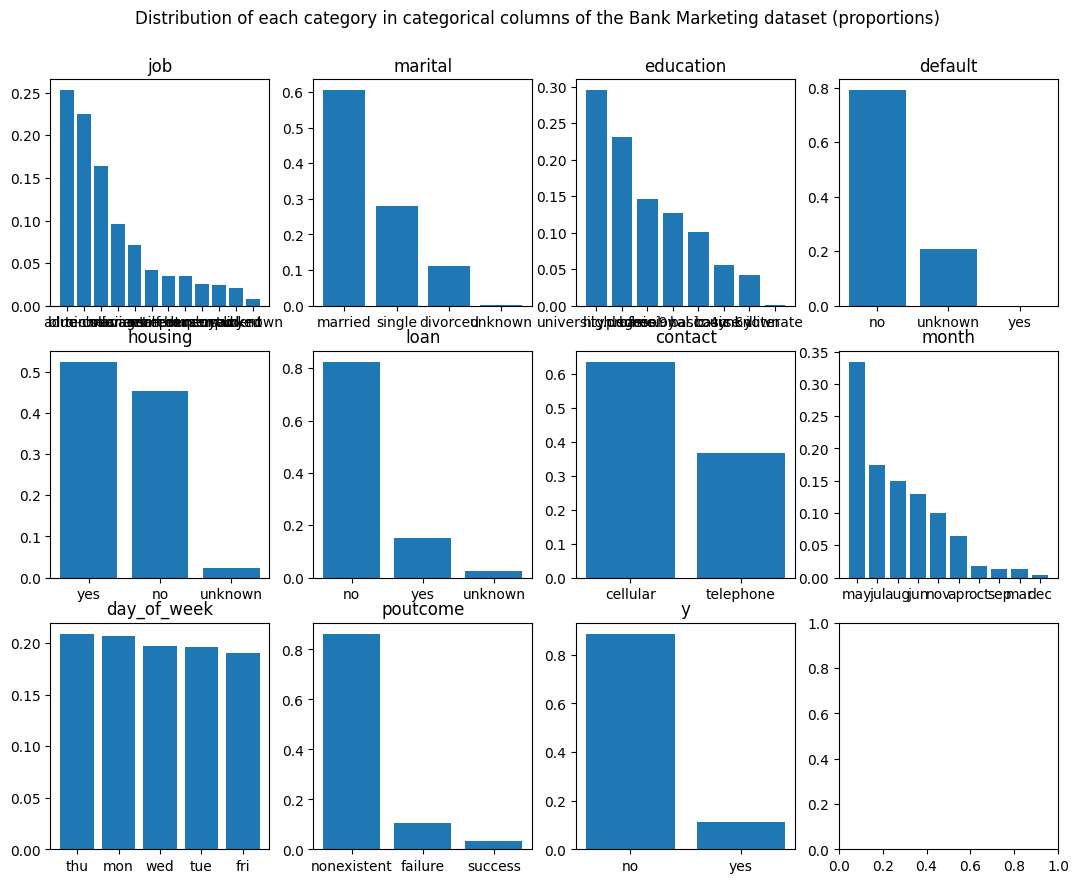

In [191]:
# Visualize the proportion of each category
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (13, 10))

counter = 0
for var in categorical_col_list:
    ax_obj = ax[counter // 4][counter % 4]
    ax_obj.bar(bank_marketing[var].value_counts().index, bank_marketing[var].value_counts().values / bank_marketing.shape[0])
    ax_obj.set_title(var)
    counter += 1

fig.suptitle('Distribution of each category in categorical columns of the Bank Marketing dataset (proportions)', y = 0.95)

For some variables (such as ```job```, ```education```, and ```month```), the category names may overlap in this large single figure due to lack of space. I decide to plot each of these variable again using separate code blocks to better show their unique category names.

Text(0.5, 0.95, "Distribution of the clients' occupations in the marketing campaign")

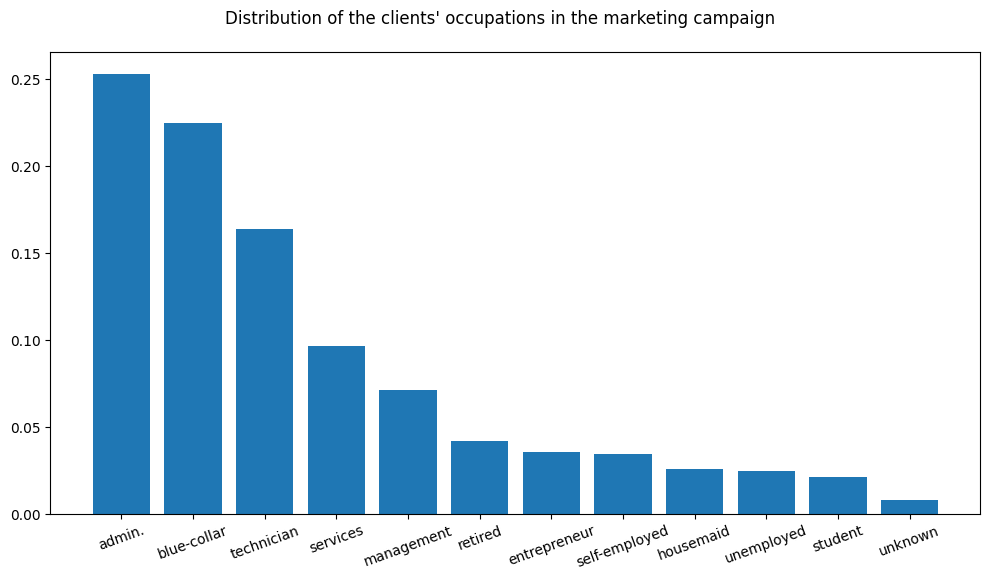

In [192]:
# Zoom in for bar plots with many categories
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(bank_marketing['job'].value_counts().index, bank_marketing['job'].value_counts().values / bank_marketing.shape[0])
plt.xticks(rotation = 20)
fig.suptitle('Distribution of the clients\' occupations in the marketing campaign', y = 0.95)

Text(0.5, 0.95, "Distribution of the clients' levels of education in the marketing campaign")

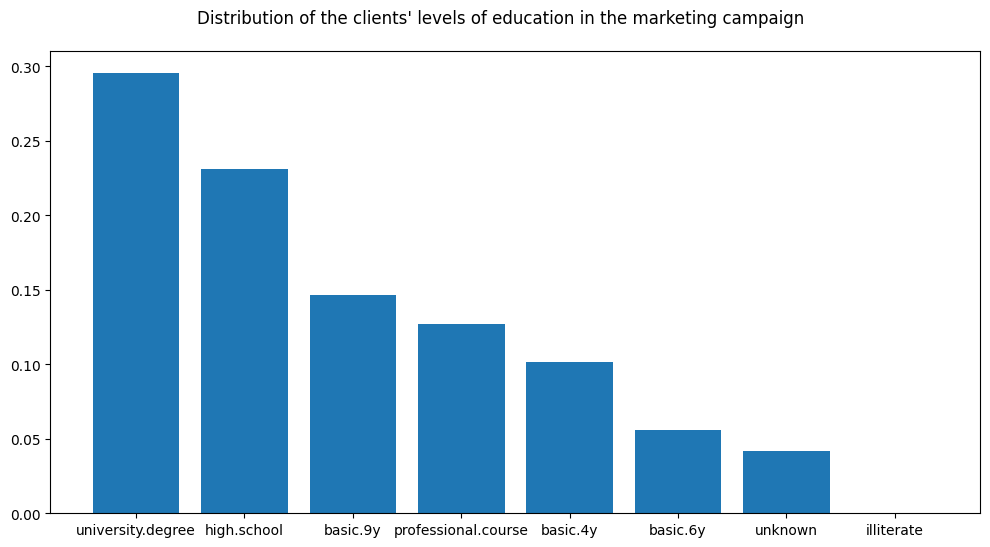

In [193]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(bank_marketing['education'].value_counts().index, bank_marketing['education'].value_counts().values / bank_marketing.shape[0])
fig.suptitle('Distribution of the clients\' levels of education in the marketing campaign', y = 0.95)

Text(0.5, 0.95, "Distribution of the clients' last contact month in the marketing campaign")

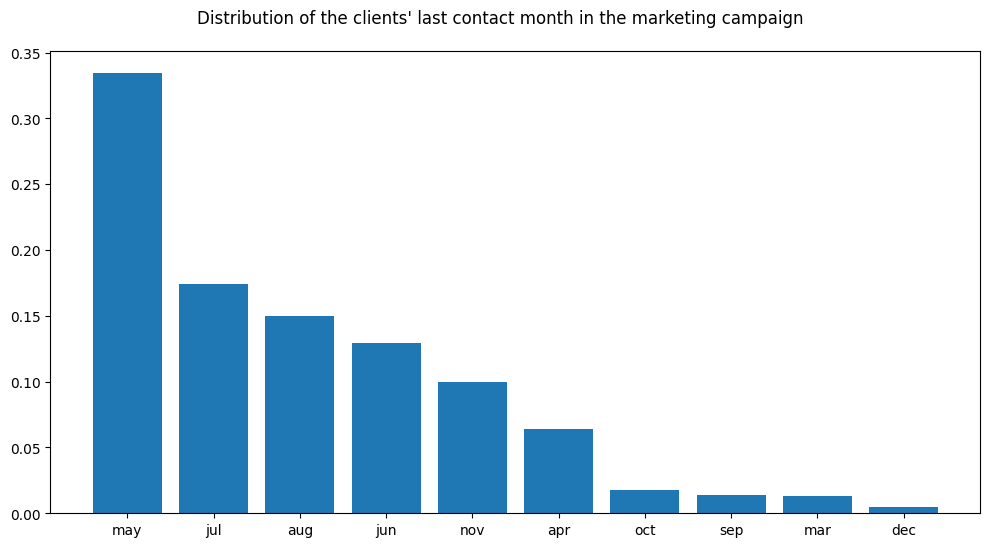

In [194]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(bank_marketing['month'].value_counts().index, bank_marketing['month'].value_counts().values / bank_marketing.shape[0])
fig.suptitle('Distribution of the clients\' last contact month in the marketing campaign', y = 0.95)

#### Some insights from categorical columns:

The major finding from these graphs is that there is a heavy class imbalance in the target variable ```y```. Over 80% of our clients did not subscribe a term deposit in the bank's marketing campaign. Therefore, I need to use stratified sampling to ensure that our training examples are representative of the original dataset when we use ```train_test_split``` later when implementing a classification model.

Some other major features of the data include:

- The majority of clients contacted by the bank are married, has housing loan, and contacts by cellular. Most customers do not have credit in default or personal loan, and has not been contacted in the previous marketing campaign.
- In terms of customer backgrounds, over half of the customers have administrative, blue-collar, or technician jobs. More than half of the customers also have completed a high school and/or a university degree, and there are a very small proportion of customers who are illiterate.
- Most clients have been last contacted during the summer months (May to August). The day of the week when a client was last contacted are nearly evenly distributed across weekdays (Monday to Friday).

#### 4. How does the rate of success differ from each customer category?

In [195]:
# https://stackoverflow.com/questions/64754905/create-100-stacked-bar-chart
count_jobs = bank_marketing[['job', 'y']].value_counts(normalize = True).unstack('y')
count_jobs
# This would make a stacked bar chart showing the true proportions of each category in the total customer body

y,no,yes
job,,
admin.,0.220242,0.032806
blue-collar,0.209193,0.015492
entrepreneur,0.032344,0.003011
housemaid,0.023165,0.002574
management,0.063037,0.007965
retired,0.031203,0.010539
self-employed,0.030887,0.003618
services,0.088510,0.007843
student,0.014569,0.006678


In [196]:
count_jobs = bank_marketing[['job', 'y']].groupby('job').value_counts(normalize = True).unstack('y')
count_jobs

y,no,yes
job,,
admin.,0.870358,0.129642
blue-collar,0.931049,0.068951
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747528,0.252472
self-employed,0.895144,0.104856
services,0.918599,0.081401
student,0.685714,0.314286


In [197]:
count_jobs.items

<bound method DataFrame.items of y                    no       yes
job                              
admin.         0.870358  0.129642
blue-collar    0.931049  0.068951
entrepreneur   0.914835  0.085165
housemaid      0.900000  0.100000
management     0.887825  0.112175
retired        0.747528  0.252472
self-employed  0.895144  0.104856
services       0.918599  0.081401
student        0.685714  0.314286
technician     0.891707  0.108293
unemployed     0.857988  0.142012
unknown        0.887879  0.112121>

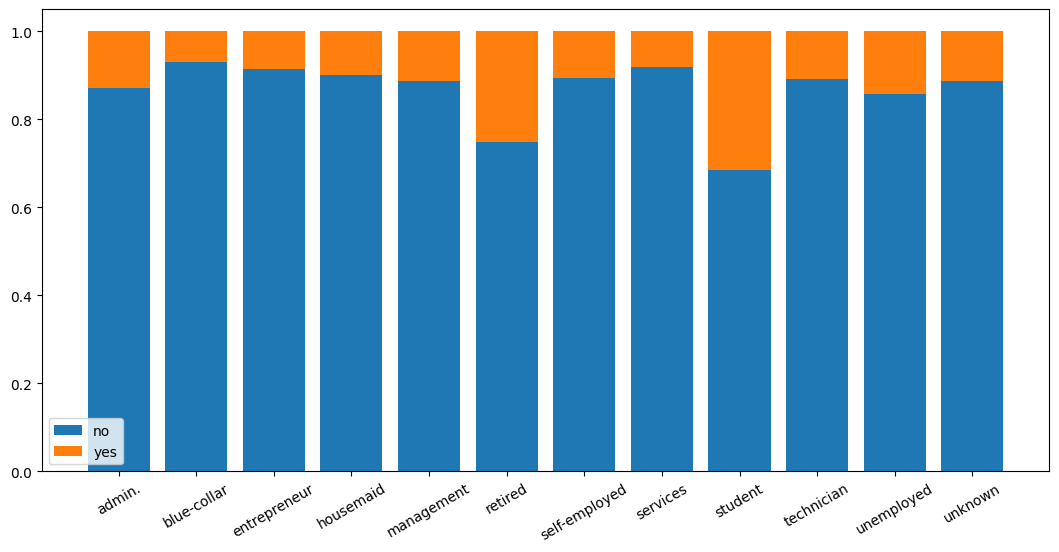

In [198]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

fig, ax = plt.subplots(figsize = (13, 6))
bottom = np.zeros(count_jobs.shape[0]) # Initialize the "base" part of each individual bar

for category, proportion in count_jobs.items():
    p = ax.bar(x = count_jobs.index, height = proportion, label = category, bottom=bottom)
    bottom += proportion

ax.legend(loc = 'lower left')
ax.tick_params(axis='x', labelrotation = 30)

Do the same with other variables...

In [199]:
def stacked_bar_100_percent(var, fig, ax):
    new_df = bank_marketing[[var, 'y']].groupby(var).value_counts(normalize = True).unstack('y')
    
    bottom = np.zeros(new_df.shape[0])
    
    for category, proportion in new_df.items():
        p = ax.bar(x = new_df.index, height = proportion, label = category, bottom = bottom)
        bottom += proportion
    
    ax.legend(loc = 'lower left')

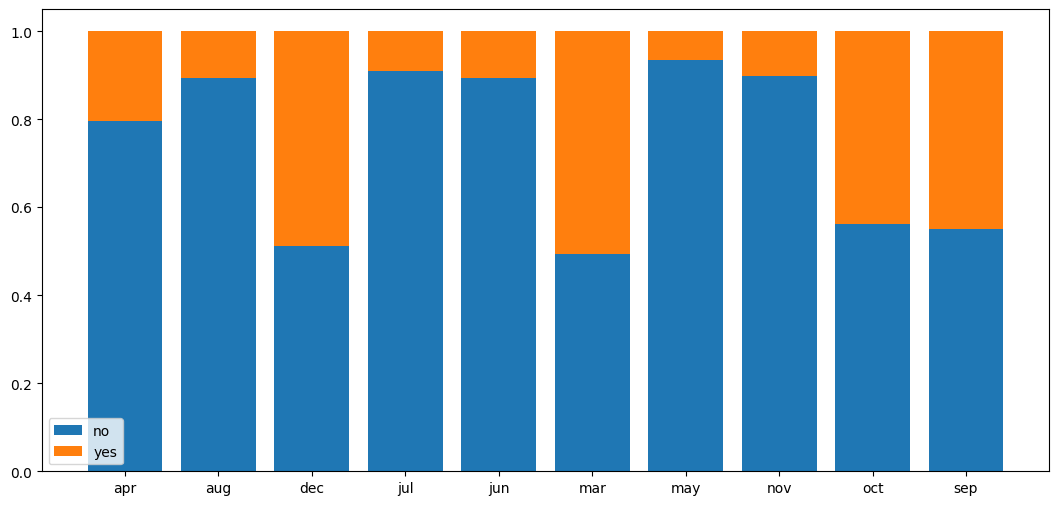

In [200]:
fig, ax = plt.subplots(figsize = (13, 6))
stacked_bar_100_percent('month', fig, ax)

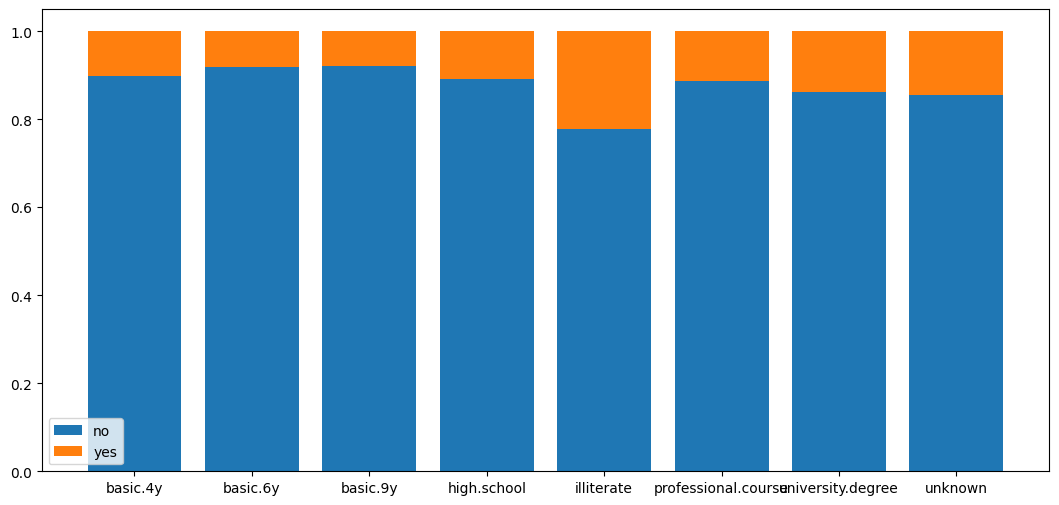

In [201]:
fig, ax = plt.subplots(figsize = (13, 6))
stacked_bar_100_percent('education', fig, ax)

Now plot all variables at once...

In [202]:
# Drop the target variable 'y' from the list of categorical variables
cat_features = categorical_col_list.copy()
cat_features.remove('y')
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

Text(0.5, 0.95, 'Proportion of clients who subscribed to a term deposit in each category')

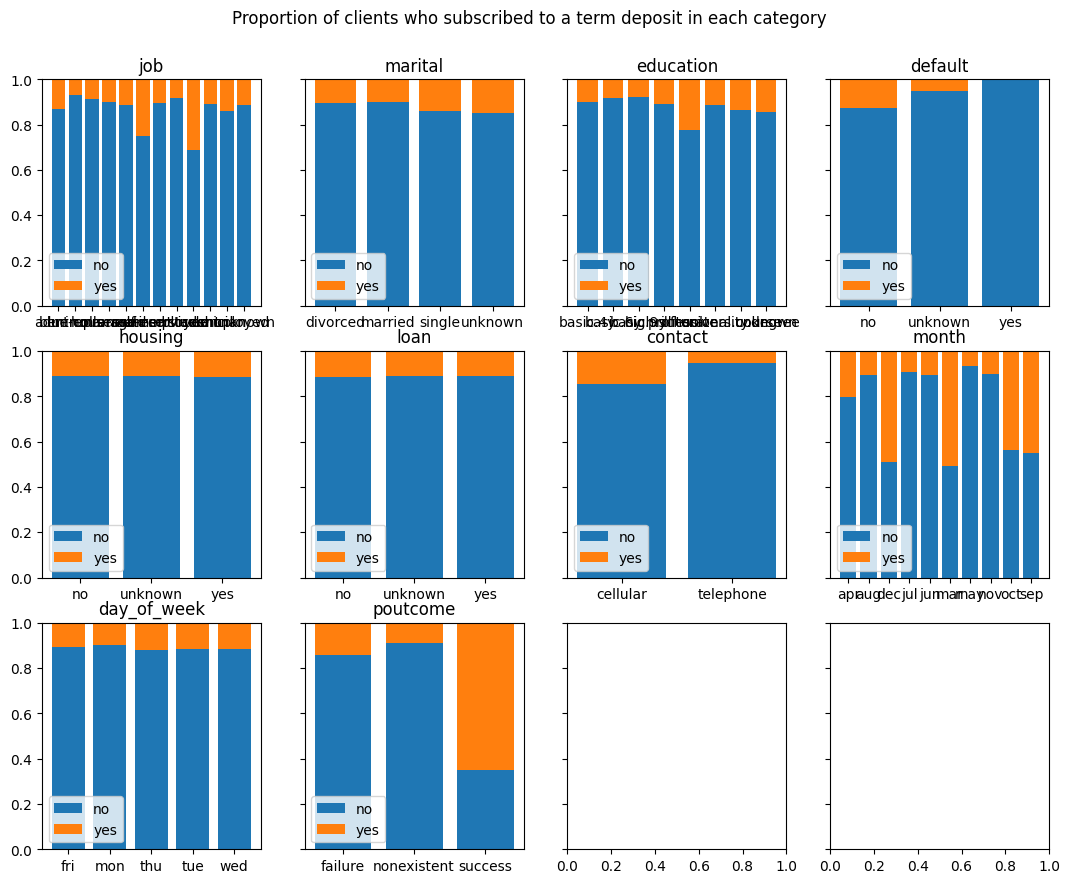

In [203]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (13, 10), sharey = True)

counter = 0

for var in cat_features:
    ax_obj = ax[counter // 4][counter % 4]
    stacked_bar_100_percent(var, fig, ax_obj)
    ax_obj.set_title(var)
    counter += 1

fig.suptitle('Proportion of clients who subscribed to a term deposit in each category', y = 0.95)

### III. Pre-processing before implementing classification models

In [204]:
# Import the necessary machine learning libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.pipeline import make_pipeline, Pipeline # imblearn to add the oversampling step into the pipeline

The dataset has many categorical variables, and thus I need to encode each categorical values for the machine learning models to run smoothly.

In [205]:
bank_marketing_ml = bank_marketing.copy()
bank_marketing_ml['pdays_missing'] = np.where(pday_missing['pdays'] == 999, 1, 0)
# We replace the '999' dummy value with a better value of 0, since we have created a new indicator for missing pdays
bank_marketing_ml['pdays'] = bank_marketing_ml['pdays'].replace(999, 0)
bank_marketing_ml.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1


In [206]:
bank_marketing_pdays = pd.DataFrame(bank_marketing['pdays'])
bank_marketing_pdays['pdays_missing'] = np.where(bank_marketing_pdays['pdays'] == 999, 1, 0)
# We replace the '999' dummy value with a better value of 0, since we have created a new indicator for missing pdays
bank_marketing_pdays['pdays'] = bank_marketing_pdays['pdays'].replace(999, 0)
bank_marketing_pdays.head()

,pdays,pdays_missing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [207]:
# Get dummies for categorical variables
# I also treat "unknown" as a class label
categorical_dummies = pd.get_dummies(bank_marketing[categorical_col_list].drop('y', axis = 1), dtype = int)
categorical_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [208]:
# Drop the "pdays" column because we have preprocessed the data for this column
# Drop the "duration" column because as the data curator has suggested, "duration" is closely linked to the target variable
numerical_data = bank_marketing[numerical_col_list].drop(['pdays', 'duration'], axis = 1)
numerical_data.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0


In [209]:
# Combine the necessary columns to get the feature variables for a model
bank_marketing_features = pd.concat([numerical_data, categorical_dummies, bank_marketing_pdays], axis = 'columns')
bank_marketing_features.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays,pdays_missing
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [210]:
# Split the DataFrame into feature and target variables
X = bank_marketing_features.values

# Encode the target variable (originally "yes/no")
label_enc = LabelEncoder()
y = label_enc.fit_transform(bank_marketing['y'])

# Check if they are NumPy arrays
print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(41182, 63) (41182,)


In [211]:
# Split the variables into train and test sets with 5-fold CV
stratified_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 275225)
# stratified k-fold to ensure that the training and test sets are representative of the dataset with class imbalance in the target variable

### IV. Implementing classification models and comparing the results

I should choose a metric to evaluate these classification models.

- False positive (predict positive but actual values negative): costly, because we are chasing for customers who are not likely to use the bank's service.
- False negative (predict negative but actual values positive): also costly, because we are missing potential customers.

False positive and false negative are equally costly, and we want to pinpoint one that balances between these two. Therefore, I have chosen the F1-score. I would average them across folds in the classification because the folds (in K-Fold) have the same size and they are all stratified.

In [212]:
# Set seed for reproducibility
my_seed = 275225

# Scale features for faster convergence
scaler = StandardScaler()

In [213]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state = my_seed, sampling_strategy = 'minority')

In [214]:
def result_table(model_name, model):

    f1_macro = []
    f1_1 = []
    precision_1 = []
    recall_1 = []

    # https://stackoverflow.com/questions/48417867/access-to-numbers-in-classification-report-sklearn

    for train_index, test_index in stratified_kf.split(X, y):
        # Extract the training set and test set with StratifiedKFold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Scale the features for faster convergence
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Over-sample for the training set because of class imbalance (approximately 90% of target variable is negative class)
        X_train_scaled_over, y_train_over = over_sampler.fit_resample(X_train_scaled, y_train)

        # Fit the model
        model.fit(X_train_scaled_over, y_train_over) # this is where the model variable comes in
        y_pred = model.predict(X_test_scaled)

        # Extract classification report as a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict = True)

        # Add the necessary metrics so that we can calculate the mean later
        f1_macro.append(report_dict['macro avg']['f1-score'])
        f1_1.append(report_dict['1']['f1-score'])
        precision_1.append(report_dict['1']['precision'])
        recall_1.append(report_dict['1']['recall'])

    # Output the results as a pandas DataFrame
    overall_result = pd.DataFrame({'model_name': [model_name],
                                   'mean_f1_macro': [statistics.mean(f1_macro)],
                                   'std_f1_macro': [statistics.stdev(f1_macro)],
                                   'mean_f1_1': [statistics.mean(f1_1)],
                                   'mean_precision_1': [statistics.mean(precision_1)],
                                   'mean_recall_1': [statistics.mean(recall_1)]})

    return overall_result

Test different classification models with sklearn's default hyperparameters:

In [215]:
import re
import warnings
warnings.filterwarnings(action = 'ignore', message = r'^X does not have valid feature names')

In [216]:
model_list = [('Logistic Regression', LogisticRegression(random_state = my_seed)),
              ('K-Nearest Neighbors', KNeighborsClassifier()), # this model has no random_state
              ('Decision Tree Classifier', DecisionTreeClassifier(random_state = my_seed)),
              ('Bagging Classifier', BaggingClassifier(random_state = my_seed)),
              ('Random Forest Classifier', RandomForestClassifier(random_state = my_seed)),
              ('AdaBoost Classifier', AdaBoostClassifier(random_state = my_seed)),
              ('Gradient Boosting', GradientBoostingClassifier(random_state = my_seed)),
              ('XGBoost', xgb.XGBClassifier(random_state = my_seed)),
              ('CatBoost', CatBoostClassifier(random_state = my_seed, verbose = False)), # suppress CatBoost updates on its learning process
              ('LightGBM', lgb.LGBMClassifier(random_state = my_seed, verbose = -1))] # suppress LightGBM updates on its learning process

entire_results = pd.concat([result_table(model_name, model) for model_name, model in model_list], ignore_index = True)
entire_results = entire_results.sort_values(['mean_f1_macro', 'std_f1_macro'], ascending = [False, True])
entire_results

,model_name,mean_f1_macro,std_f1_macro,mean_f1_1,mean_precision_1,mean_recall_1
9,LightGBM,0.692107,0.007699,0.474917,0.384727,0.620608
8,CatBoost,0.687626,0.004980,0.465887,0.380864,0.599914
6,Gradient Boosting,0.682571,0.007682,0.463870,0.363709,0.640222
7,XGBoost,0.678013,0.004808,0.449733,0.366886,0.580941
5,AdaBoost Classifier,0.677405,0.005610,0.452696,0.360045,0.609612
0,Logistic Regression,0.676300,0.006635,0.453356,0.355302,0.626211
4,Random Forest Classifier,0.673816,0.004665,0.415098,0.455833,0.381117
3,Bagging Classifier,0.659836,0.006152,0.389944,0.428820,0.357619
2,Decision Tree Classifier,0.616055,0.011702,0.322247,0.310288,0.335634
1,K-Nearest Neighbors,0.607888,0.006674,0.356060,0.259837,0.565636


#### V. Hyperparameter tuning for boosted meta-models and stacking for a stronger meta-meta-model

In [217]:
def randomized_search_tune(model_name, model, param_dist_model, extraction = 'score'):
    """The 'extraction' parameter can be either 'model' (extracting the best-performing model) or 'score' (averaging the scores on each fold of the best-performing model)."""

    randomized_cv = RandomizedSearchCV(model, param_distributions = param_dist_model, cv = stratified_kf, scoring = 'f1_macro')
    best_scores = []

    for train_index, test_index in stratified_kf.split(X, y):
        # Extract the training set and test set with StratifiedKFold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Scale the features for faster convergence
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Over-sample for the training set because of class imbalance (approximately 90% of target variable is negative class)
        X_train_scaled_over, y_train_over = over_sampler.fit_resample(X_train_scaled, y_train)

        # Fit and transform the model
        randomized_cv.fit(X_train_scaled_over, y_train_over) # this is where the model variable comes in
        # Predict with the model
        # Note that we need to change the array of X_test_scaled to a DataFrame to suppress the "X does not have valid feature names, but LGBMClassifier was fitted with feature names"
        X_test_scaled_df = pd.DataFrame(X_test_scaled)
        X_test_scaled_df.columns = bank_marketing_features.columns # align the X_test_scaled data with the feature column names
        y_pred = randomized_cv.predict(X_test_scaled_df)

        best_scores.append(randomized_cv.best_score_)

    if extraction == 'score':
        overall_result = pd.DataFrame({'model_name': [model_name], 'mean_best_scores': [statistics.mean(best_scores)], 'std_best_scores': statistics.stdev(best_scores)})
        return overall_result
    elif extraction == 'model':
        return randomized_cv.best_estimator_
    else:
        raise Exception("The 'extraction' parameter should be either 'model' or 'score' (averaging the scores on each fold of the best-performing model).")

The macro F1 penalizes low F1 scores of the under-represented class, making it ideal for addressing class imbalance.

In [218]:
# Tuning for LightGBM
# https://www.geeksforgeeks.org/machine-learning/lightgbm-light-gradient-boosting-machine/

lgb_classifier = lgb.LGBMClassifier(random_state = my_seed, verbose = -1)

param_dist_lgbm = {
    'n_jobs': [-1],
    'n_estimators': [int(10 ** x) for x in np.arange(2, 5, 0.5)],
    'max_depth': np.append(np.arange(1, 101, 1), -1),
    'num_leaves': np.arange(1, 101, 1),
    'learning_rate': [10 ** x for x in np.arange(-3, 0, 0.5)],
    'min_split_gain': [10 ** x for x in np.arange(-2, 0, 0.5)]
}

In [219]:
randomized_search_tune('lgbm', lgb_classifier, param_dist_lgbm)

,model_name,mean_best_scores,std_best_scores
0,lgbm,0.941318,0.015337


In [220]:
# Tuning for XGBoost
xgb_classifier = xgb.XGBClassifier(random_state = my_seed, n_jobs = -1)

param_dist_xgb = {
    'n_estimators': [int(10 ** x) for x in np.arange(2, 4, 0.5)],
    'learning_rate': [10 ** x for x in np.arange(-3, 0, 0.5)],
    'subsample': [10 ** x for x in np.arange(-3, 0, 0.5)],
    'reg_alpha': [10 ** x for x in np.arange(-3, 2, 0.5)]
}

In [221]:
randomized_search_tune('xgb', xgb_classifier, param_dist_xgb)

,model_name,mean_best_scores,std_best_scores
0,xgb,0.877414,0.055965


In [222]:
# Tuning for Gradient Boosting
gradient_classifier = GradientBoostingClassifier(random_state = my_seed)
param_dist_gradient = {
    'n_estimators': [int(10 ** x) for x in np.arange(2, 5, 0.5)],
    'learning_rate': [10 ** x for x in np.arange(-3, 0, 0.5)],
    'max_depth': np.arange(1, 101, 1)
}

In [223]:
# Tuning for AdaBoost
adaboost_classifier = AdaBoostClassifier(random_state = my_seed)
param_dist_ada = {
    'n_estimators': [int(10 ** x) for x in np.arange(2, 5, 0.5)],
    'learning_rate': [10 ** x for x in np.arange(-3, 0, 0.5)]
}

In [224]:
# Tuning for CatBoost

After I have tuned many boosting classifiers, now is the time to stack them up and become a more powerful classifier.

**(WORK IN PROGRESS)**

#### Side note: Feature importance

**Feature importance based on the Logistic Regression model (default hyperparameters):**

<BarContainer object of 63 artists>

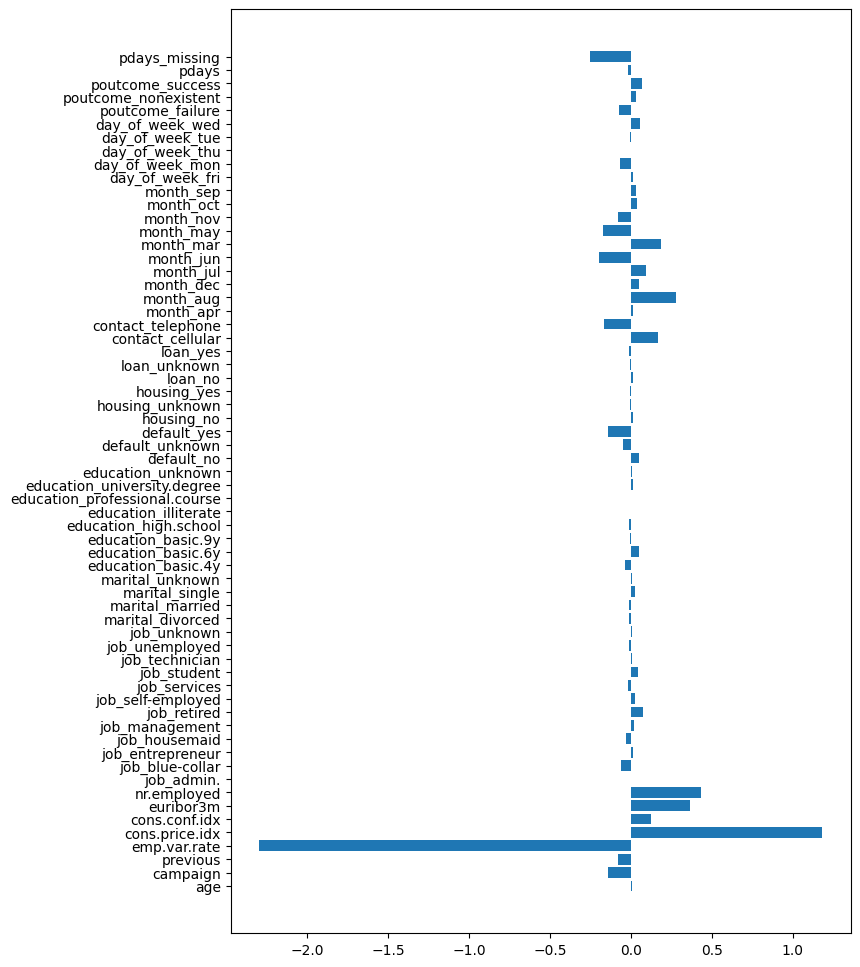

In [225]:
logreg = LogisticRegression(random_state = my_seed)
result_table('Logistic Regression', logreg)
fig, ax = plt.subplots(figsize = (8, 12))
plt.barh(bank_marketing_features.columns.tolist(), logreg.coef_.flatten())

**Feature importance based on the XGBoost model (default hyperparameters):**

<BarContainer object of 63 artists>

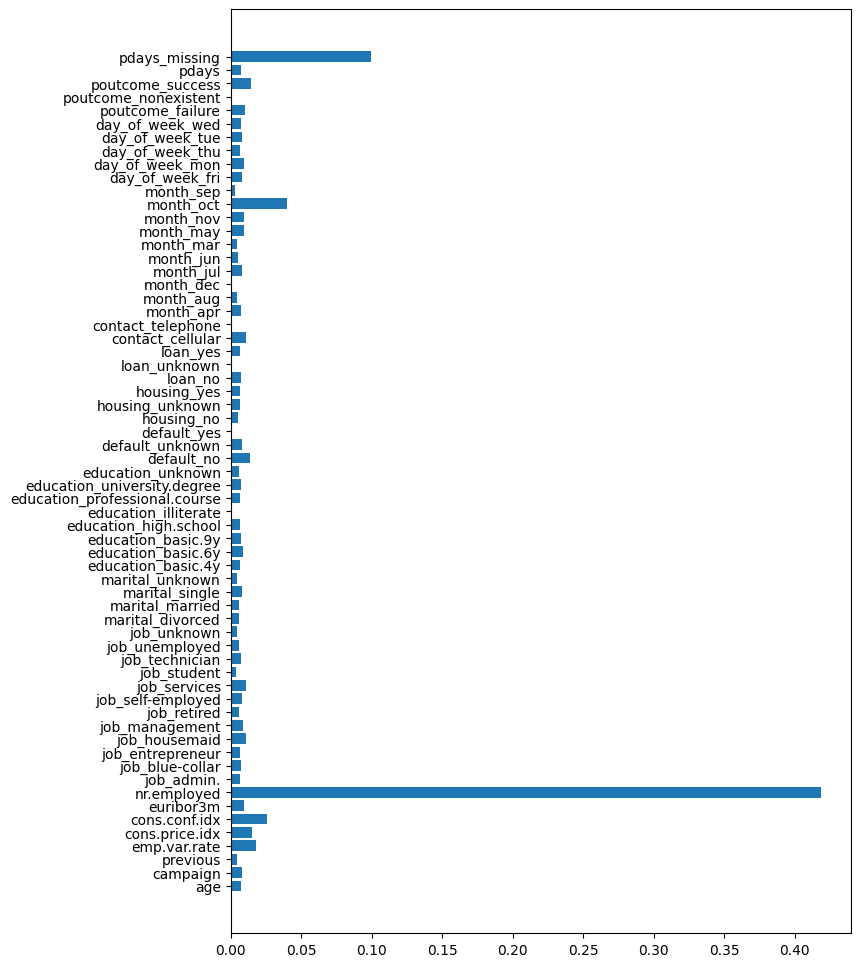

In [226]:
xgboost = xgb.XGBClassifier(random_state = my_seed)
result_table('XGBoost', xgboost)
fig, ax = plt.subplots(figsize = (8, 12))
plt.barh(bank_marketing_features.columns.tolist(), xgboost.feature_importances_)